# Sheridan Kamal

## DATA 73500 - Assignment 10

### Purpose
In this notebook I am providing the code that I used to create a correlation matrix heatmap to choose features for my final dataset. A heatmap is the best way to display the correlation matrix because it makes obvious which features are highly correlated with each other. Any text that accompanies this visual will be focused on which features I am selecting for my final dataset based on the results of the correlation matrix and the visual will be reinforcing my choices. The emphasis is on the visual rather than the text since the way the correlation matrix heatmap is set up makes it easy to read and to identify highly correlated features.

### Data
Since the features I needed for my dataset were not conveniently included in a downloadable dataset, I had to download each feature separately and combine them together into one dataframe. I was able to pull each economic feature separately from FRED (Federal Reserve Economic Data from the Federal Reserve Bank of St. Louis) using Quandl, which also had the added bonus of automatically calculating selected transformations if I chose to do so, and the financial feature was downloadable from Yahoo! Finance so I downloaded the dataset and created the transformed variables in Excel and imported the dataset as a CSV. I created Recession labels from a list of start and end dates. I then concated each feature and the labels using an inner join to create one dataframe. Using this dataframe, I created the correlation heatmap with a color bar.

In [1]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import quandl as qnd

tbond_10yr = qnd.get('FRED/GS10')
tbond_10yr_pchange = qnd.get('FRED/GS10', transformation = "rdiff") #Percent change transformation
spread_2yr = qnd.get('FRED/T10Y2YM')
fedrate = qnd.get('FRED/FEDFUNDS')
fedrate_pchange = qnd.get('FRED/FEDFUNDS', transformation = "rdiff") #Percent change transformation
nonfarm_payrolls = qnd.get('FRED/PAYEMS')
nonfarm_payrolls_pchange = qnd.get('FRED/PAYEMS', transformation = "rdiff") #Percent change transformation
cpi = qnd.get('FRED/CPIAUCSL')
cpi_pchange = qnd.get('FRED/CPIAUCSL', transformation = "rdiff") #Percent change transformation
snp_500 = pd.read_csv('S&P 500 Index.csv', sep = ',', parse_dates = ['Date'], index_col = 'Date') #Four columns of percent change transformations
recessions = {'1': {'Begin': '1957-08-01', 'End': '1958-04-01'}, 
              '2': {'Begin': '1960-04-01', 'End': '1961-02-01'}, 
              '3': {'Begin': '1969-12-01', 'End': '1970-11-01'}, 
              '4': {'Begin': '1973-11-01', 'End': '1975-03-01'}, 
              '5': {'Begin': '1980-01-01', 'End': '1980-07-01'}, 
              '6': {'Begin': '1981-07-01', 'End': '1982-11-01'}, 
              '7': {'Begin': '1990-07-01', 'End': '1991-03-01'}, 
              '8': {'Begin': '2001-03-01', 'End': '2001-11-01'}, 
              '9': {'Begin': '2007-12-01', 'End': '2009-06-01'}}

In [2]:
for recession in recessions:
    end_condition = (recessions[recession]['End'] >= snp_500.index)
    begin_condition = (snp_500.index >= recessions[recession]['Begin'])
    snp_500.loc[end_condition & begin_condition, 'Recession'] = 1

snp_500['Recession'].fillna(0, inplace = True)
snp_500.head()

,Close,1 Month,3 Months,6 Months,12 Months,Recession
Date,,,,,,
1927-12-01,17.660000,NaN,NaN,NaN,NaN,0.0
1928-01-01,17.570000,-0.005109,NaN,NaN,NaN,0.0
1928-02-01,17.260000,-0.017801,NaN,NaN,NaN,0.0
1928-03-01,19.280001,0.110677,0.087766,NaN,NaN,0.0
1928-04-01,19.750000,0.024085,0.116961,NaN,NaN,0.0


In [3]:
df = pd.concat([tbond_10yr, tbond_10yr_pchange, spread_2yr, fedrate, fedrate_pchange, nonfarm_payrolls, nonfarm_payrolls_pchange, cpi, cpi_pchange, snp_500], axis = 1, join = 'inner')
df.columns = ['10yr Tbond', '% Change Tbond', '2yr Spread', 'Fedrate', '% Change Fedrate', 'Nonfarm Payrolls', '% Change Payrolls', 'CPI', '% Change CPI', 'S&P 500', '% Change 1M', '% Change 3M', '% Change 6M', '% Change 12M', 'Recession']
df.head()

,10yr Tbond,% Change Tbond,2yr Spread,Fedrate,% Change Fedrate,Nonfarm Payrolls,% Change Payrolls,CPI,% Change CPI,S&P 500,% Change 1M,% Change 3M,% Change 6M,% Change 12M,Recession
Date,,,,,,,,,,,,,,,
1976-06-01,7.86,-0.005063,0.80,5.48,0.035917,79376.0,0.000807,56.7,0.005319,104.279999,0.040111,0.014586,0.145161,0.091205,0.0
1976-07-01,7.83,-0.003817,0.98,5.31,-0.031022,79547.0,0.002154,57.0,0.005291,103.440002,-0.008088,0.017555,0.025258,0.153168,0.0
1976-08-01,7.77,-0.007663,1.14,5.29,-0.003766,79704.0,0.001974,57.3,0.005263,102.910004,-0.005137,0.026886,0.031589,0.169327,0.0
1976-09-01,7.59,-0.023166,1.17,5.25,-0.007561,79892.0,0.002359,57.6,0.005236,105.239998,0.022389,0.009164,0.023750,0.226975,0.0
1976-10-01,7.41,-0.023715,1.43,5.02,-0.043810,79911.0,0.000238,57.9,0.005208,102.900002,-0.022486,-0.005234,0.012321,0.144672,0.0


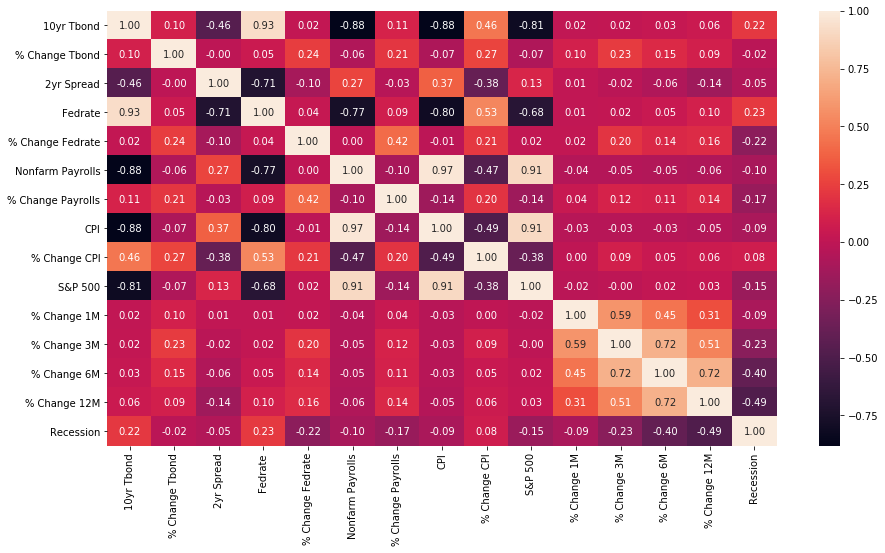

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

plt.figure(figsize = (15, 8))
sns.heatmap(df.corr(), annot = True, fmt = ".2f")